# Tutorial 3-2. Clustering

## Agenda: 
1. K-means clustering `KMeans`
2. Clustering evaluation
2. Hierarchical clustering `AgglomerativeClustering`

## Data: 20 beers
- attributes: calories, sodium, alcohol, cost

In [1]:
import pandas as pd

# beer dataset
# this file is separated by ' ', not comma
beer = pd.read_csv('beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


We will cluster 20 beers with 4 attributes.

In [2]:
# define X (input variables used for clustering)
X = beer.drop('name', axis=1)
names = beer['name']

Normalize feature scales to prevent a large-scale feature dominates the clustering results!

In [3]:
# z-normalization: center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

## 1. K-means clustering

In [4]:
from sklearn.cluster import KMeans

# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [5]:
# review the cluster labels
km.labels_

array([0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1],
      dtype=int32)

In [6]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values(by='cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


What are the "characteristics" of each cluster?

In [7]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


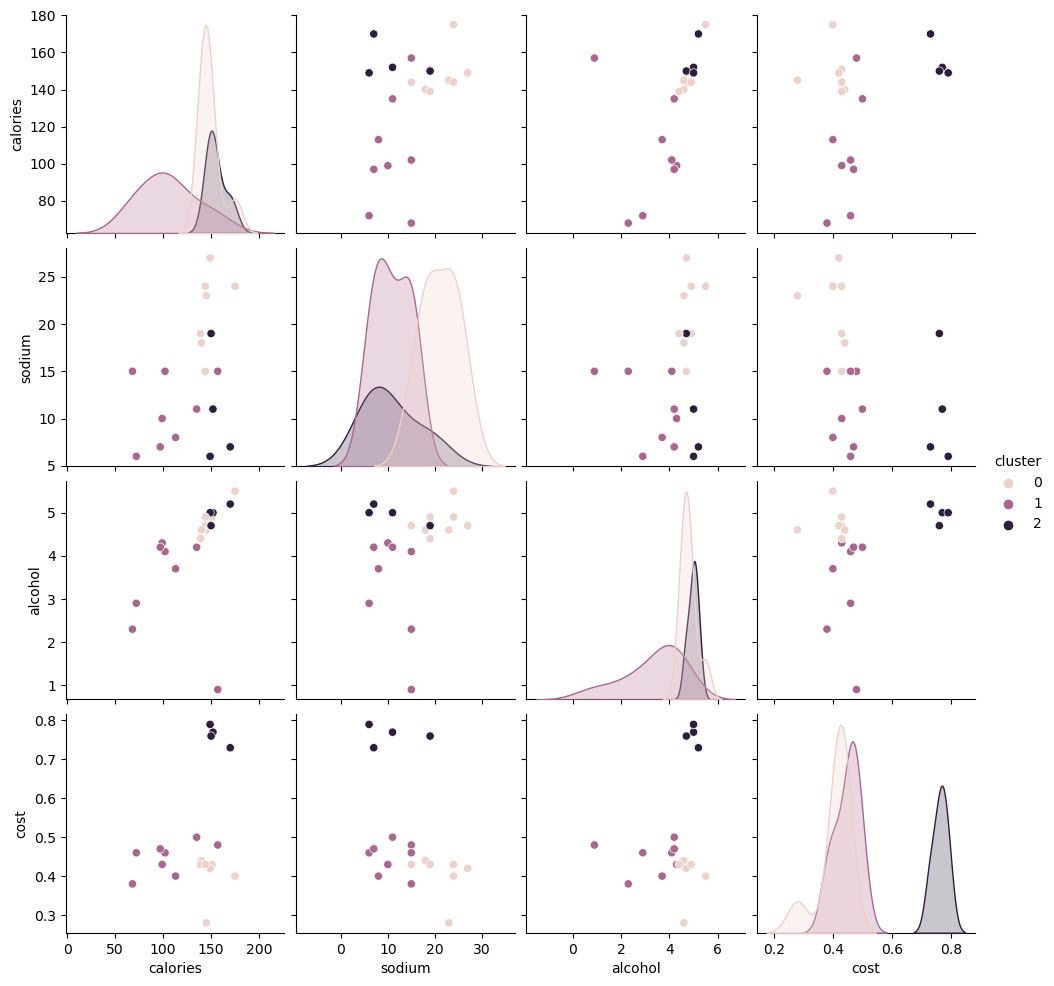

In [8]:
import seaborn as sns

# scatter plot matrix of cluster assignments
sns.pairplot(beer, hue='cluster')

## 2. Clustering Evaluation

To evaluate clustering "performance" in situations when the "true" cluster assignments are not known, we can use those two common metrics below:

1. **WSS (Within-cluster Sum of Squares)**: 
- Sum of squared distances between data sample and their cluster centroids. 
- we can obtain WSS from `.inertia_` attribute. The lower the better. 
- Use elbow method to find the optimal number of clusters.

2. **Silhouette Coefficient**: for each observation, silhouette score $SC$ is calculated by

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A global score is calculated by taking the mean score for all observations.

In [9]:
from sklearn.metrics import silhouette_score

numClusters = range(2, 15) 
SSE = []
silhouette = []
# for the number of clusters from 2 to 14,
for k in numClusters:
    # clustering
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(X)
    # check WSS
    wss = k_means.inertia_
    SSE.append(wss)
    # check silhouette
    sil = silhouette_score(X_scaled, k_means.labels_)
    silhouette.append(sil)

print(SSE)
print(silhouette)

/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[3860.8251976190477, 2427.507164285715, 1239.4006833333333, 914.7223833333333, 647.4419699999999, 490.34252000000004, 344.73621999999995, 277.13622, 206.03500000000003, 157.3518, 108.36965, 69.52125000000001, 47.827899999999985]
[0.30572471117043276, 0.19454664171120434, 0.10116555478680986, 0.10601016966776164, 0.10014572371203681, 0.061785520029560746, -0.019271251756408533, 0.06514846779589023, 0.09114645797624923, 0.07507406638042617, 0.09727397810716795, 0.11630104204581145, 0.07912438844505298]


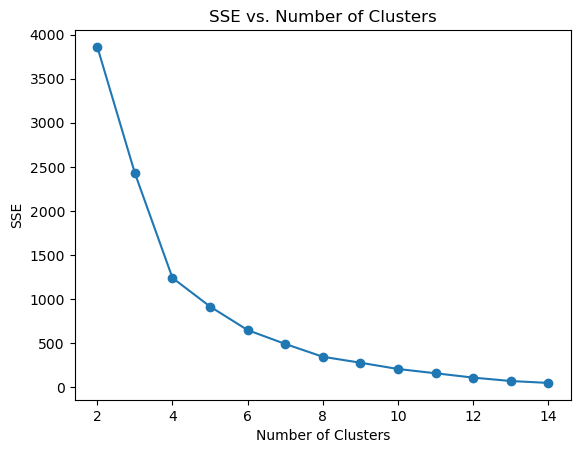

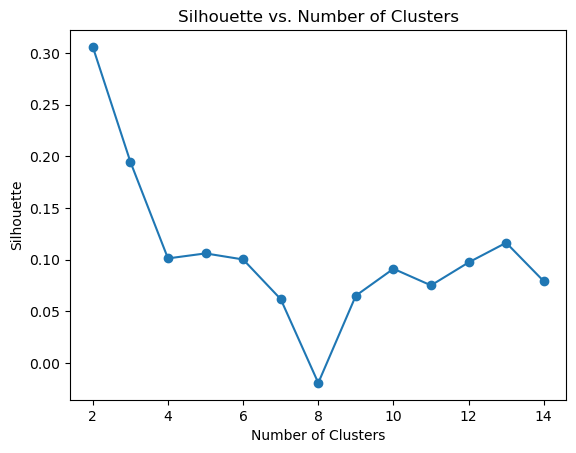

In [10]:
# visualization
import matplotlib.pyplot as plt

plt.plot(numClusters, SSE, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

plt.plot(numClusters, silhouette, marker='o')
plt.title('Silhouette vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.show()

Choose the number of clusters `k=4`!

In [11]:
k_means = KMeans(n_clusters=4, random_state=1)
k_means.fit(X)
beer['cluster'] = k_means.labels_
beer.sort_values(by='cluster')

/home/gugu/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
16,Hamms,139,19,4.4,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
14,Kirin,149,6,5.0,0.79,0
13,Becks,150,19,4.7,0.76,0


In [12]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,146.25,17.25,4.383333,0.513333
1,102.75,10.00,4.075000,0.440000
2,172.50,15.50,5.350000,0.565000
3,70.00,10.50,2.600000,0.420000


In [13]:
# count data points by cluster ID
beer['cluster'].value_counts()

0    12
1     4
2     2
3     2
Name: cluster, dtype: int64

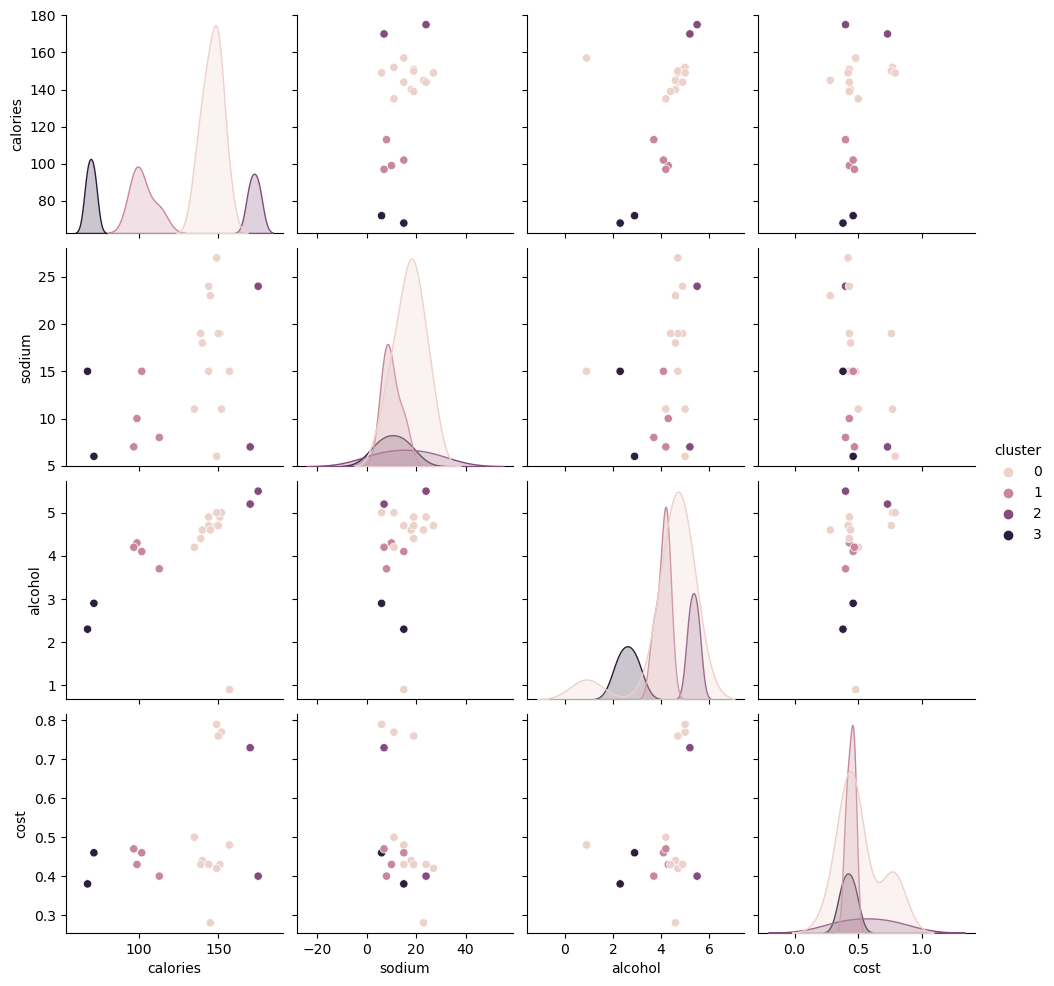

In [14]:
# scatter plot matrix of cluster assignments
sns.pairplot(beer, hue='cluster')

## 3. Hierarchical Clustering

We first define a function to visualize dendrogram.

In [15]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(model, figsize=(10, 5), **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=figsize)
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    if 'labels' not in kwargs:
        xlabel = "Number of points in node (or index of point if no parenthesis)."
    else:
        xlabel = "Data Sample"
    ylabel = "Distance"
    if 'orientation' in kwargs and kwargs['orientation'] == 'right':
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    else:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

Hierarchical clustering with average linkage.

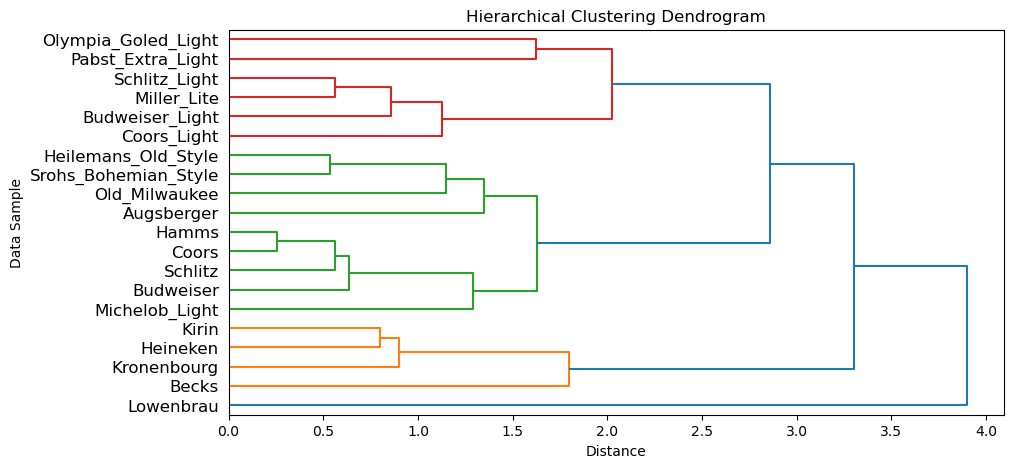

In [16]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=None, # for dendrogram
                                distance_threshold=0, # ensures full tree computation
                                linkage='average')
model.fit(X_scaled)
plot_dendrogram(model, labels=names.tolist(), orientation='right')

`n_clusters=4` will be okay!

In [17]:
# hierarchical clustering
model = AgglomerativeClustering(n_clusters=4, linkage='average')
model.fit(X_scaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [18]:
beer['cluster_hierarchical'] = model.labels_ # hierarchical clustering label results
beer.sort_values('cluster_hierarchical')

,name,calories,sodium,alcohol,cost,cluster,cluster_hierarchical
9,Budweiser_Light,113,8,3.7,0.40,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,3,0
11,Coors_Light,102,15,4.1,0.46,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,3,0
8,Miller_Lite,99,10,4.3,0.43,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0
6,Augsberger,175,24,5.5,0.40,2,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
12,Michelob_Light,135,11,4.2,0.50,0,1


In [19]:
# review the cluster centers
beer.groupby('cluster_hierarchical').mean()

,calories,sodium,alcohol,cost,cluster
cluster_hierarchical,,,,,
0,91.833333,10.166667,3.583333,0.433333,1.666667
1,146.888889,20.000000,4.722222,0.417778,0.222222
2,155.250000,10.750000,4.975000,0.762500,0.500000
3,157.000000,15.000000,0.900000,0.480000,0.000000


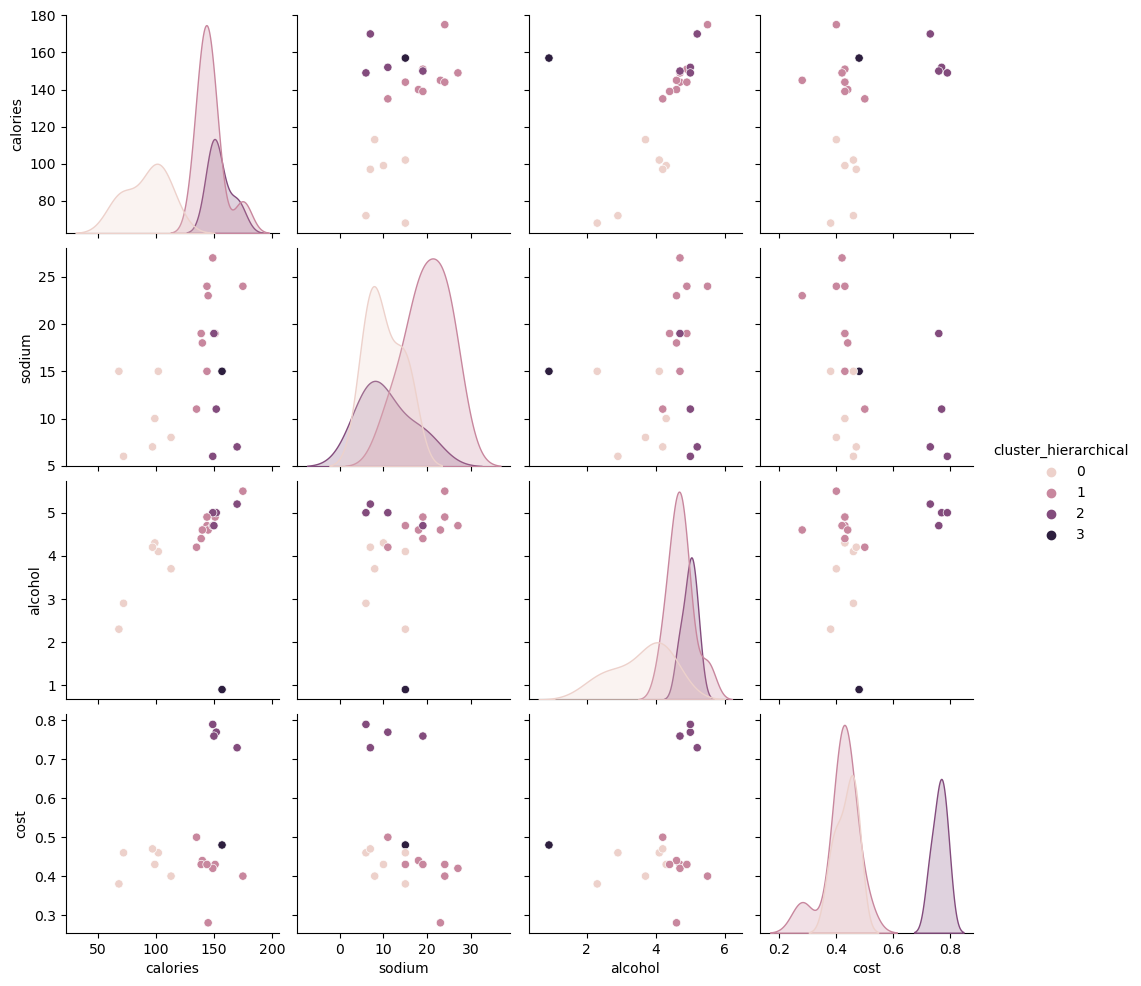

In [20]:
# scatter plot matrix of cluster assignments
sns.pairplot(beer.drop('cluster', axis=1), hue='cluster_hierarchical')